# Лабораторная работа №1. Методы оптимизации

In [2]:
from sklearn import datasets
from typing import Tuple, Mapping

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.animation as animation
import numpy as np

## Функция Швефеля
### x,y от -10 до 10
### глобальный экстремум 0
### точка глобального экстремума (0, 0)

In [3]:
def func_Shvefel(x: np.ndarray) -> np.float64:
    return x[0] * x[0] + (x[0] + x[1]) ** 2

def grad_Shvefel(x: np.ndarray) -> np.ndarray:
    return np.array([2 * x[0] + 2 * (x[0] + x[1]), 2 * (x[0] + x[1])])

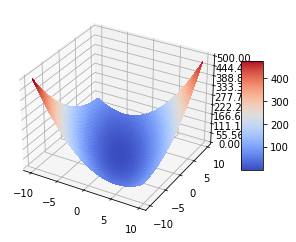

In [12]:
# Make data.
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
Z = func_Shvefel(np.array([X, Y]))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [5]:
def my_GD(f: Mapping, df: Mapping, x0: np.ndarray, lr: float = 0.001, max_iter: int = 10000) -> tuple[np.ndarray, np.float32, np.ndarray]:
    x_old = x0.copy()
    history = [np.array([x_old[0], x_old[1], f(x_old)])]
    for i in range(max_iter):
        x_new = x_old - lr * df(x_old)
        x_old = x_new
        history.append(np.array([x_new[0], x_new[1], f(x_new)]))

    return x_new, f(x_new), np.array(history)

In [77]:
%matplotlib notebook

In [130]:
def init_2():
    # Plot the surface.
    X = np.arange(-10, 10, 0.25)
    Y = np.arange(-10, 10, 0.25)
    X, Y = np.meshgrid(X, Y)
    Z = f(np.array([X, Y]))
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    # Customize the z axis.
    #ax.set_zlim(-1.01, 1.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.02f}')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    xx = ax.scatter(x0[0], x0[1], f(x0), c = 'black')
    return surf, xx

def update_point(i, history):
    print(history[i])
    xx.set_data(history[i][0], history[i][1], history[i][2], c = 'black')
    return xx

def plot_GD(f: Mapping, df: Mapping, x0: np.ndarray, lr: float = 0.001, max_iter: int = 10000):
    x1, z1, history = my_GD(f, df, x0, lr, max_iter)

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
        
    ani = animation.FuncAnimation(fig, update_point, frames=range(max_iter), fargs = (history,), init_func=init_2, interval=500, blit=True)
    plt.show()
    return x1, z1

In [131]:
my_GD(func_Shvefel, grad_Shvefel, np.array([10, 10]), max_iter = 5000)

(array([-0.03741523,  0.06053912]),
 0.0019346137822891848,
 array([[ 1.00000000e+01,  1.00000000e+01,  5.00000000e+02],
        [ 9.94000000e+00,  9.96000000e+00,  4.94813600e+02],
        [ 9.88032000e+00,  9.92020000e+00,  4.89681316e+02],
        ...,
        [-3.74724642e-02,  6.06317209e-02,  1.94053674e-03],
        [-3.74438378e-02,  6.05854024e-02,  1.93757300e-03],
        [-3.74152333e-02,  6.05391192e-02,  1.93461378e-03]]))

<IPython.core.display.Javascript object>


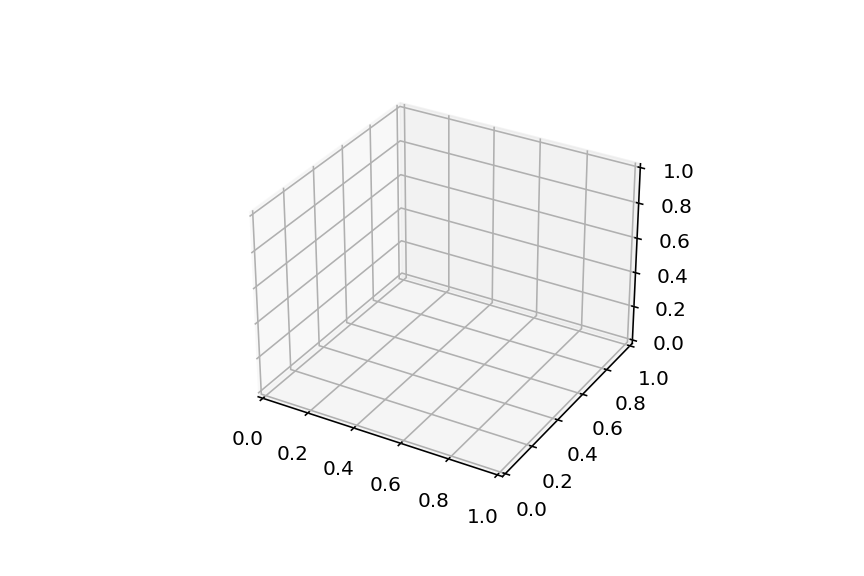

(array([-0.03741523,  0.06053912]), 0.0019346137822891848)

In [132]:
plot_GD(func_Shvefel, grad_Shvefel, np.array([10, 10]), max_iter = 5000)

In [6]:
def test_func1(x: np.ndarray) -> np.float64:
    return np.sum(np.square(x))

def test_func1_grad(x: np.ndarray) -> np.float64:
    return 2 * x

In [9]:
my_GD(test_func1, test_func1_grad, np.array([100, 100]))

(2.0202860902384853e-07, 2.0202860902384853e-07, 8.16311177282221e-14)